### Importing Libraries

In [1]:
import pandas as pd
data1 = pd.read_csv('healthcare-dataset-stroke-data.csv') 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\lauren.spruce\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [52]:
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score
from sklearn.pipeline import FeatureUnion, make_pipeline

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from matplotlib import cm

### Data Pre-processing

In [5]:
data1.shape

(5110, 12)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [8]:
def plot_roc_curve(y_true, y_score):
    from sklearn.metrics import roc_curve, auc
    
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(9, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC (auc = {:0.2}'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

def plot_confusion_matrix(cm, class_names):
    import itertools
   
    cm = cm.astype(np.float) / cm.sum(axis=1)[:, np.newaxis]
 
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > cm.max() / 2 else "black"
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color=color)
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
   
    plt.show()

In [9]:
data1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
process1 = data1.copy()

In [11]:
le = LabelEncoder()
process1['gender'] = le.fit_transform(process1['gender'])
process1['ever_married'] = le.fit_transform(process1['ever_married'])
process1['work_type'] = le.fit_transform(process1['work_type'])
process1['Residence_type'] = le.fit_transform(process1['Residence_type'])
process1['smoking_status'] = le.fit_transform(process1['smoking_status'])
process1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [12]:
# Drop NaNs

In [13]:
process1.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
process1 = process1.dropna()

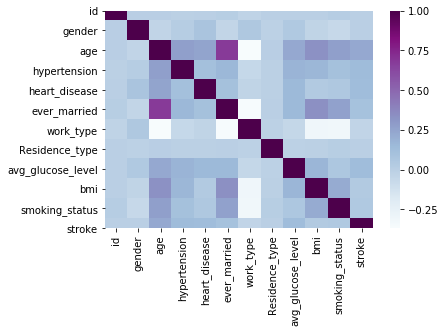

In [15]:
sns.heatmap(process1.corr(), cmap='BuPu')

##### Observations on this confusion matrix indicates a correlation between age and ever_married. This makes sense as common sense tells us that the older you are the more likely you are to have been married.

##### Following the advice of various medical bodies, it seems that guidance revolves around maintaining a healthy lifestyle in order to help prevent a stroke. It is for this reason that I decided to choose 6 parameters for my models relating to diet and lifestyle; age, hypertension, smoking_status, heart_disease, bmi and avg_glucose_level.

In [16]:
process1["stroke"].value_counts() 

0    4700
1     209
Name: stroke, dtype: int64

In [17]:
# Drop unnessecary ID column
process1 = process1.drop('id', axis = 1)
process1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


### Visualisation

0    4700
1     209
Name: stroke, dtype: int64

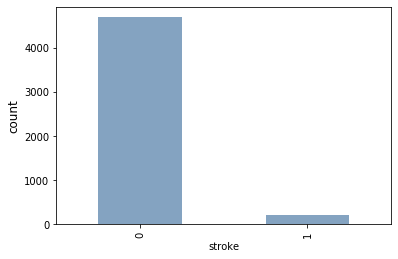

In [18]:
process1['stroke'].value_counts().plot(kind='bar', color=(0.2, 0.4, 0.6, 0.6))
plt.ylabel("count", fontsize = 12)
plt.xlabel('stroke')
process1.stroke.value_counts()

### Feature Scaling

In [25]:
X = process1.drop('stroke', axis=1)
y = process1['stroke']

In [26]:
scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)
X = pd.DataFrame(X_scaled, columns = X.columns)

In [27]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.198428,1.070138,-0.318067,4.381968,0.729484,-0.155697,0.985640,2.777698,0.981345,-0.351788
1,1.198428,1.646563,-0.318067,4.381968,0.729484,-0.155697,-1.014569,0.013842,0.459269,0.585232
2,-0.833023,0.272012,-0.318067,-0.228208,0.729484,-0.155697,0.985640,1.484132,0.701207,1.522252
3,-0.833023,1.602222,3.143994,-0.228208,0.729484,0.759651,-1.014569,1.549193,-0.623083,0.585232
4,1.198428,1.690903,-0.318067,-0.228208,0.729484,-0.155697,0.985640,1.821368,0.013595,-0.351788


### Test Train Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [48]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3436, 10)
Number transactions y_train dataset:  (3436,)
Number transactions X_test dataset:  (1473, 10)
Number transactions y_test dataset:  (1473,)


In [50]:
test_train = pd.DataFrame({'Train': y_train.shape, 'Test': y_test.shape})
test_train

,Train,Test
0,3436,1473


### Modelling

In [43]:
all_models = [LogisticRegression(), KNeighborsClassifier(), SVC()]

In [45]:
recall = []
accuracy = []

for model in all_models:
    cv = cross_val_score(model, X_train, y_train, scoring ='recall', cv=10).mean()
    recall.append(cv)

    cv = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=10).mean()
    accuracy.append(cv)

In [47]:
model = ['LogisticRegression', 'KNeighborsClassifier', 'SVC']

scores = pd.DataFrame({'Model': model, 'Accuracy': accuracy, 'Recall': recall})

scores


,Model,Accuracy,Recall
0,LogisticRegression,0.959546,0.000000
1,KNeighborsClassifier,0.957802,0.021978
2,SVC,0.959546,0.000000


In [33]:
scores.mean(axis = 0)

Accuracy    0.958892
Recall      0.007418
dtype: float64

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
pred = knn.predict(X_test)

In [36]:
print(confusion_matrix(y_test, pred, labels=(1,0)))
print(classification_report(y_test, pred))

[[   0   70]
 [   5 1398]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1403
           1       0.00      0.00      0.00        70

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.91      0.95      0.93      1473



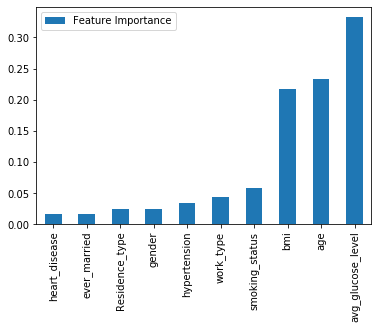

In [54]:
# Feature Importance

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

pd.DataFrame(dtc.feature_importances_, index=X.columns, columns=['Feature Importance']).sort_values(by='Feature Importance').plot.bar()

### Making a Prediction

In [39]:
def prediction(feat_value):
    scaled = scaler.transform(feat_value)
    return knn.predict(feat_value)

In [46]:
prediction([[0, 24, 0, 0, 0, 0, 1, 130, 25, 0]])

C:\Users\lauren.spruce\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\lauren.spruce\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int64)